In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1) Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

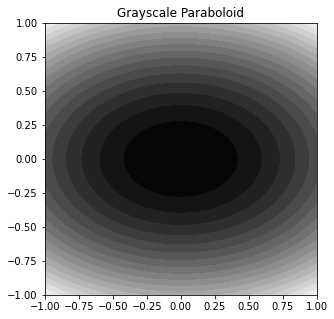

In [137]:
plt.figure(figsize = (8, 5))

x = np.linspace(-1,1,50)
y = np.linspace(-1,1,50)

a = 1.5
b = 1

xx, yy = np.meshgrid(x, y, sparse=True)
z = (xx/a)**2 + (yy/b)**2

plt.contourf(x, y, z, 20, cmap='gray')
#plt.imshow(z, cmap='gray')
plt.axis('scaled')
plt.title("Grayscale Paraboloid")
plt.show()

## 2) Create the image of a rotated sin using rotation of coordinates

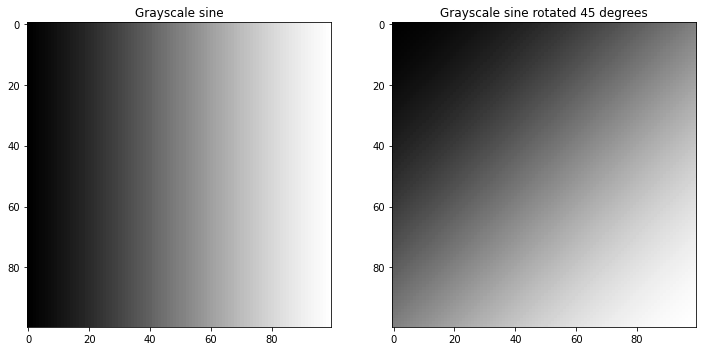

In [119]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)

t = 45
f = 100
theta = np.pi * (t/180) 

xx, yy = np.meshgrid(x, y)

z = np.sin(xx)

u = xx*np.cos(theta) + yy*np.sin(theta)

w = np.sin(u)


plt.figure(figsize = (12, 10))

plt.subplot(1, 2, 1)
plt.imshow(z, cmap='gray')
plt.axis('scaled')
plt.title("Grayscale sine")

plt.subplot(1, 2, 2)
plt.imshow(w, cmap='gray')
plt.axis('scaled')
plt.title(f"Grayscale sine rotated {t} degrees")

plt.show()

### Create a Gaussian image

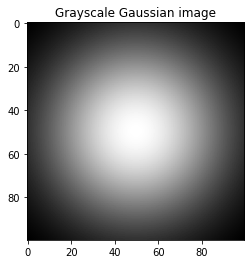

In [109]:
import numpy as np

x = np.linspace(-1,1, 100)
y = np.linspace(-1,1, 100)

X, Y = np.meshgrid(x, y)

sigma = .6
muu = 0.0
  
x_component = ((X - muu)**2) / (2 * sigma **2)
y_component = ((Y - muu)**2) / (2 * sigma **2)
    
gauss = np.exp( - (x_component + y_component))

  
#plt.contourf(x, y, gauss, 30, cmap='gray')
plt.imshow(gauss, cmap='gray')
plt.axis('scaled')
plt.title("Grayscale Gaussian image")
plt.show()

### Create a function that generates the image of a Gaussian optionally rotate by an angle $\theta$ and with $m_x$, $m_y$, $s_x$, $s_y$ as input arguments.

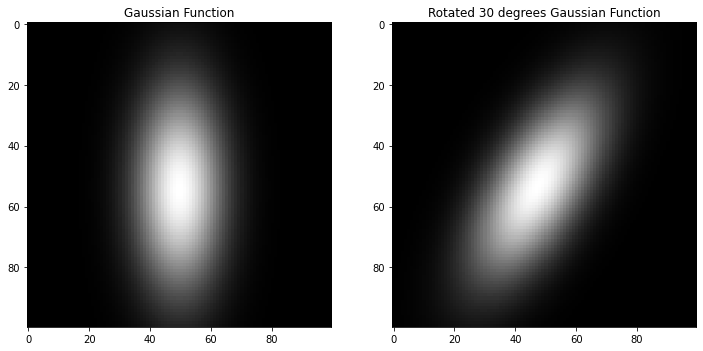

In [91]:
import numpy as np

def gaussian2d(x = 0.0, y = 0.0, mx = 0.0, my = 0.0, sx = 1.0, sy = 1.0):
    
    x_component = ((x - mx)**2) / (2 * sx**2)
    y_component = ((y - my)**2) / (2 * sy**2)
    
    return np.exp( - (x_component + y_component))


def get_x_rot(x_old, y_old, theta):
    return x_old*np.cos(theta) + y_old*np.sin(theta)

def get_y_rot(x_old, y_old, theta):
    return x_old*np.sin(theta) - y_old*np.cos(theta)

t = 30
rotate = True
theta = np.pi * (t/180)

mx, my = 0.0, 0.5
sx, sy = 1.0, 2.3

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)

z = gaussian2d(X, Y, mx, my, sx, sy)

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)

plt.imshow(z, cmap='gray')
plt.axis('scaled')
plt.title("Gaussian Function")

if rotate:
    
    w = gaussian2d(get_x_rot(X, Y, theta),
                   get_y_rot(X, Y, theta),
                   get_x_rot(mx, 0, theta),
                   get_y_rot(0, my, theta),
                   sx, sy
    )
    
    plt.subplot(1, 2, 2)
    plt.imshow(w, cmap='gray')
    plt.axis('scaled')
    plt.title(f"Rotated {t} degrees Gaussian Function")

plt.show()